In [61]:
import torch
import numpy as np
import os
import pandas as pd

In [3]:
from transformers import AutoTokenizer, AutoModel

In [4]:
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
model = AutoModel.from_pretrained('bert-base-uncased', output_hidden_states=True)

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/420M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [25]:
def read_samples(path, n=20):
    questions, true_ans, false_ans = [], [], []
    with open(path, 'r') as f:
        for i, line in enumerate(f):
            if i % 6 == 0:
                questions.append(line.rstrip())
            elif i % 6 == 1:
                true_ans.append(line.rstrip())
            elif i % 6 == 2:
                false_ans.append(line.rstrip())
            if len(false_ans) >= n:
                break
    return questions, true_ans, false_ans


def get_bert_embedding(sentence):
    input_ids = torch.tensor(tokenizer.encode(sentence)).unsqueeze(0)
    outputs = model(input_ids)
    hidden_states = outputs.hidden_states[-2][0]
    sentence_embedding = hidden_states.mean(axis=0).detach().numpy()
    return sentence_embedding

In [26]:
categories = ['what', 'why', 'how', 'who', 'when', 'where', 'which']

In [27]:
questions_all = []
true_answers_all = []
false_answers_all = []

In [28]:
for type_str in categories:
    path = os.path.join('/home/ubuntu/11777-Project/common/tmp/', type_str + '50.txt')
    questions, true_ans, false_ans = read_samples(path)
    questions_all.append(questions)
    true_answers_all.append(true_ans)
    false_answers_all.append(false_ans)

In [35]:
questions_all[0][-1], true_answers_all[0][-1], false_answers_all[0][-1]

("What is on the kid's shirt?", 'A monkey.', 'A robot.')

In [80]:
questions_embeddings = [[get_bert_embedding(q) for q in questions] for questions in questions_all]
true_answers_embeddings = [[get_bert_embedding(ta) for ta in true_answers] for true_answers in true_answers_all]
false_answers_embeddings = [[get_bert_embedding(fa) for fa in false_answers] for false_answers in false_answers_all]

In [81]:
true_embed_all = np.vstack(true_answers_embeddings)
false_embed_all = np.vstack(false_answers_embeddings)

In [83]:
true_embed_all.shape, false_embed_all.shape

((140, 768), (140, 768))

In [84]:
ans_embed_all = np.vstack((true_embed_all, false_embed_all))

In [44]:
questions_embed_all = np.vstack(questions_embeddings)

In [46]:
questions_embed_all.shape

(140, 768)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [55]:
tsne = TSNE(n_components=2, init='random', random_state=0)
features = tsne.fit_transform(questions_embed_all)

In [59]:
features[:20].shape

(20, 2)

In [62]:
labels = np.repeat([0, 1, 2, 3, 4, 5, 6], 20)

In [63]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6])

In [65]:
df = pd.DataFrame(labels, columns=['y'])

In [47]:
colors = ['red', 'black', 'blue', 'yellow', 'green', 'orange', 'brown']

In [67]:
df['tsne1'] = features[:, 0]
df['tsne2'] = features[:, 1]

In [68]:
df

,y,tsne1,tsne2
0,0,-3.807461,-0.266278
1,0,5.004178,-6.464205
2,0,-1.527342,-0.229206
3,0,-2.774745,-2.218796
4,0,-3.183876,-0.080214
...,...,...,...
135,6,0.683523,4.600150
136,6,-3.274372,6.578784
137,6,8.110565,-0.859051
138,6,7.496559,0.938960


In [69]:
import seaborn as sns

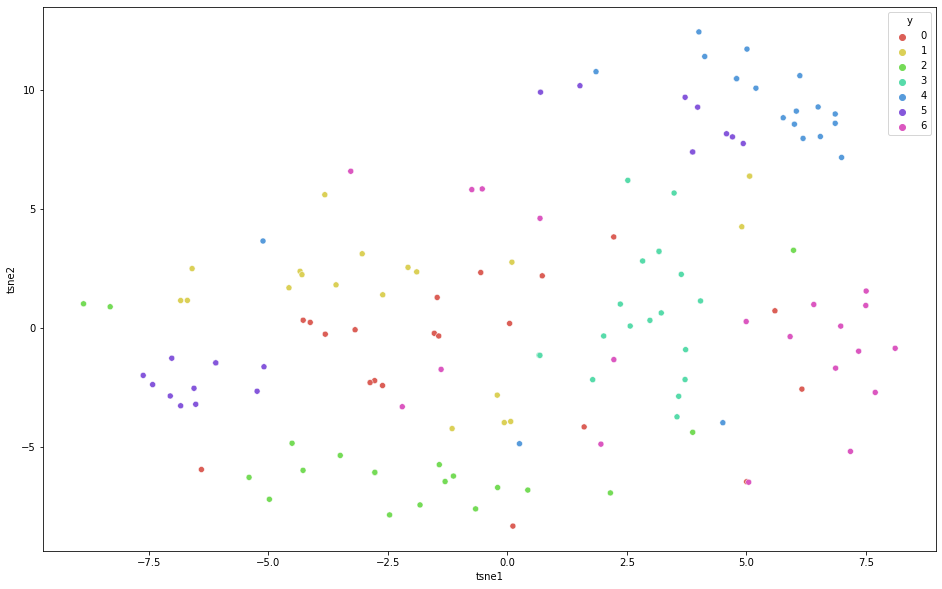

In [77]:
plt.figure(figsize=(16,10))
sns_plot = sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="y",
    palette=sns.color_palette("hls", 7),
    data=df,
    legend="full"
)

In [79]:
sns_plot.figure.savefig("questions.png")

In [89]:
tsne = TSNE(n_components=2, init='random', random_state=0)
features = tsne.fit_transform(ans_embed_all)

In [90]:
labels = np.repeat([0, 1], 140)

In [93]:
df = pd.DataFrame(labels, columns=['y'])

In [94]:
df['tsne1'] = features[:, 0]
df['tsne2'] = features[:, 1]

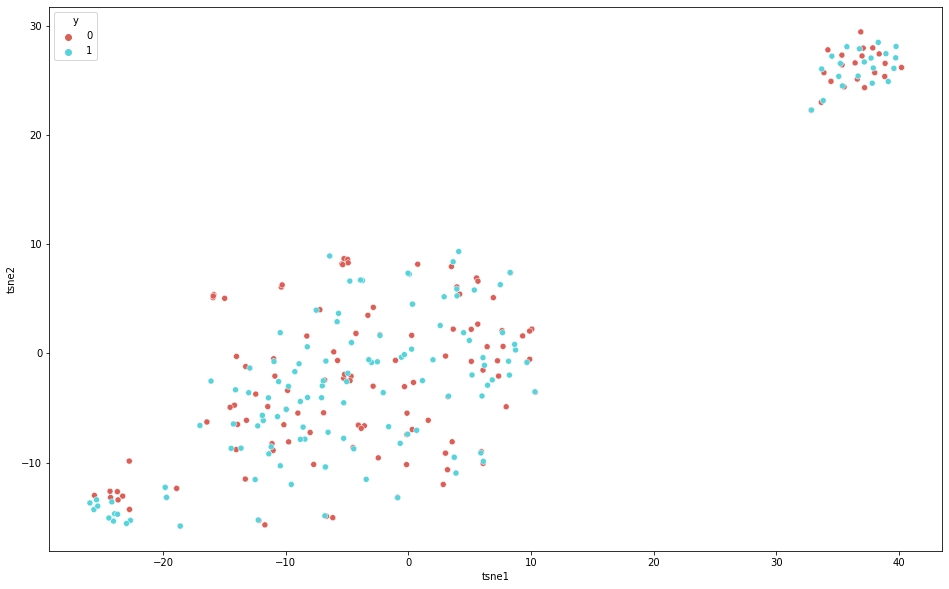

In [95]:
plt.figure(figsize=(16,10))
sns_plot = sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="y",
    palette=sns.color_palette("hls", 2),
    data=df,
    legend="full"
)

In [96]:
sns_plot.figure.savefig("answers.png")

In [3]:
from common.get_data import BasicDataProvider
bdp = BasicDataProvider(dataset_root='/home/ubuntu/11777-Project/data', 
                           dataset_name = 'dataset_v7w_telling.json')

Initializing data provider for dataset dataset_v7w_telling.json...
BasicDataProvider: reading /home/ubuntu/11777-Project/data/dataset_v7w_telling.json


In [4]:
sample = bdp.sampleImageQAPair()

In [5]:
sample['qa_pair']['type']

'why'

In [11]:
sample['qa_pair']

{'image_id': 2337762,
 'question': 'Why the men holding the surfboards?',
 'multiple_choices': ['To get to the water.', 'For fun.', 'For exercise.'],
 'qa_id': 269303,
 'answer': 'To surf.',
 'type': 'why'}

In [20]:
sample1, sample2 = bdp.sampleImageQAPair(), bdp.sampleImageQAPair()

In [24]:
question1 = sample1['qa_pair']['question']
question2 = sample2['qa_pair']['question']

In [25]:
question1, question2

('What is he holding?', 'How many giraffes are in the scene?')

In [34]:
tokenizer([question1, question2]).input_ids

[[101, 2054, 2003, 2002, 3173, 1029, 102],
 [101,
  2129,
  2116,
  21025,
  27528,
  7959,
  2015,
  2024,
  1999,
  1996,
  3496,
  1029,
  102]]

In [56]:
input_ids = torch.tensor(tokenizer.encode(question1)).unsqueeze(0)
outputs = model(input_ids)
hidden_states1 = outputs.hidden_states[-2][0]

In [57]:
input_ids = torch.tensor(tokenizer.encode(question2)).unsqueeze(0)
outputs = model(input_ids)
hidden_states2 = outputs.hidden_states[-2][0]

In [59]:
hidden_states1.shape, hidden_states2.shape

(torch.Size([7, 768]), torch.Size([13, 768]))

In [60]:
sentence_embedding1 = hidden_states1.mean(axis=0).detach().numpy()
sentence_embedding2 = hidden_states2.mean(axis=0).detach().numpy()

In [61]:
sentence_embedding1.shape, sentence_embedding2.shape

((768,), (768,))

In [65]:
np.array([sentence_embedding1, sentence_embedding2])

(2, 768)

In [66]:
all_embedding = np.array([sentence_embedding1, sentence_embedding2])

In [71]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [67]:
tsne = TSNE(n_components=2, init='random', random_state=0)
features = tsne.fit_transform(all_embedding)

In [68]:
features

array([[ -60.312317,  141.36963 ],
       [  60.31256 , -141.36914 ]], dtype=float32)

In [69]:
def tsne_plot(features):
    plt.figure()
    
    plt.xlabel('TSNE 1', fontsize=15)
    plt.ylabel('TSNE 2', fontsize=15)
    plt.title('TSNE for sentence embedding', fontsize=20)
    plt.scatter(features[:, 0], features[:, 1], c='r', s=5)
    plt.show()

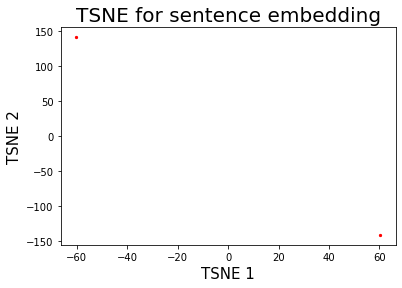

In [72]:
tsne_plot(features)